In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression


#Read in both data sets with pandas 
df_train = pd.read_csv("au_train.csv")
df_test = pd.read_csv("au_test.csv")

df_train.replace(regex={'\?':'Other'},inplace=True)
df_test.replace(regex={'\?':'Other'},inplace=True)


# df_test.info()
# df_train.info()

# Expanding the categories into numerical data  0 and 1
df_test_2 = pd.get_dummies(data=df_test,drop_first=True)
df_train_2 = pd.get_dummies(data=df_train,drop_first=True)

# Test data set has a period in the class name and I'm removing it to make the code cleaner.
df_test_2.rename( columns={'class_ >50K.': 'class_ >50K'},inplace=True)

# Defining the X 
df_test_X =df_test_2.drop(columns=['class_ >50K'])
df_train_X =df_train_2.drop(columns=['class_ >50K'])
# df_train_X =df_train_2.drop(columns=['class_ >50K','native-country_ Holand-Netherlands'])

# Defining the y 
df_train_y=df_train_2['class_ >50K']
df_test_y=df_test_2['class_ >50K']
# df_train_X.drop(columns=['native_country_ Holand-Netherlands'],inplace=True)

# Dropping fnlwgt as it is the final weight from the census. 
# This could 
df_train_X.drop(columns=['fnlwgt'],inplace=True)
df_test_X.drop(columns=['fnlwgt'],inplace=True)

# df_train_X.info(verbose=True)
# df_test_X.info(verbose=True)

# Check for missing Columns after dummy variables
#Visually inspected the dummy variables
# Found one Column that was missing in the test data set that was in the training set
df_test_X['native-country_ Holand-Netherlands']=0

# df_test_2.info()
# df_train_2.info()
# df_test.head()
# df_train.head()

# Check on the ratio of people who made more and less than 50K 
# Just a numeric number, I found it was skewed from the visual inspection with plots.
# sum(df_train_y)/len(df_train_y)
# 1-sum(df_train_y)/len(df_train_y)

# sum(df_test_y)/len(df_test_y)
# df_test_X.describe()

In [26]:
# If fnlwgt is the number of people each entry represents, and this data set is for a single year, then the sum of fnlwgt for each entry should not exceed the US population of 300 million
# sum(df_test['fnlwgt'])
# sum(df_train['fnlwgt'])

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
# Initial model
# Selected Logistic Regression as it is the obvious choise when we have a binary classification
# lr_train = LogisticRegression() # Decreased ROC
# lr_train = LogisticRegressionCV()
# lr_train = LogisticRegressionCV(cv=1,solver='lbfgs',n_jobs=-1,class_weight='balanced') # Doesn't work
# lr_train = LogisticRegressionCV(cv=2,solver='lbfgs',max_iter=1000,n_jobs=-1,class_weight='balanced')
# lr_train = LogisticRegressionCV(cv=3,solver='lbfgs',max_iter=1000,n_jobs=-1,class_weight='balanced')
# lr_train = LogisticRegressionCV(cv=4,solver='lbfgs',max_iter=1000,n_jobs=-1,class_weight='balanced')
# lr_train = LogisticRegressionCV(cv=5,solver='lbfgs',max_iter=1000,n_jobs=-1,class_weight='balanced') # This model is the most stable overral from the accuracy score from train to test data set. 
# lr_train = LogisticRegressionCV(cv=5,solver='lbfgs',max_iter=1000,n_jobs=-1,class_weight='dict')
# lr_train = LogisticRegressionCV(cv=5,solver='lbfgs',max_iter=1000,n_jobs=-1,class_weight='balanced',random_state=41) # This model is the most stable overral from the accuracy score from train to test data set. 
# lr_train_GaussianNB = GaussianNB() # Provides better accuracy score and the difference between the train and test data set are comparable, but the ROC score is drops by 1 % 
# lr_train = LinearSVC(C=1.0) # Provides lower accuracy score when compared to LogisticRegression but the difference between the train and test data set are comparable, but the ROC score is drops by 1 % 
# lr_train = RandomForestClassifier() # This model provides the best accuracy, but the ROC is very similar to LogisticRegressionCV, but the accuracy score differs by over 10% from train to test data sets.df_test
lr_train = LogisticRegressionCV(cv=2,solver='lbfgs',max_iter=1000,n_jobs=-1,random_state=41) # This model is the most stable overral from the accuracy score from train to test data set. 
classifier = lr_train.fit(X=df_train_X,y=df_train_y,sample_weight=df_train['fnlwgt']) # Attempted to use the sample weight
# classifier_GaussianNB = lr_train_GaussianNB.fit(X=df_train_X,y=df_train_y,sample_weight=df_train['fnlwgt']) # Attempted to use the sample weight
# classifier = lr_train.fit(X=df_train_X,y=df_train_y)
prediction_train_dataset = lr_train.predict(X=df_train_X)
prediction_test_dataset = lr_train.predict(X=df_test_X)

In [28]:
# Accuracy score for the trained model using the train data set
lr_train.score(X=df_train_X,y=df_train_y,sample_weight=df_train['fnlwgt'])

0.8552599829688363

In [29]:
# Accuracy score for the trained model using the test data set
lr_train.score(X=df_test_X,y=df_test_y,sample_weight=df_test['fnlwgt'])

0.8571094242791022

In [30]:
lr_train.predict_proba(df_test_X)

array([[0.99790573, 0.00209427],
       [0.8715644 , 0.1284356 ],
       [0.57478405, 0.42521595],
       ...,
       [0.30568044, 0.69431956],
       [0.70734624, 0.29265376],
       [0.17690074, 0.82309926]])

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, plot_confusion_matrix, f1_score
#ROC score
ROC_model = roc_auc_score(df_test_y,lr_train.predict_proba(df_test_X)[:,1],sample_weight=df_test['fnlwgt'])
print('The ROC score is : ',ROC_model)
print('The f1 score of the modle : ', f1_score(df_test_y,prediction_test_dataset,average='binary'))
false_positive_r,true_positive_r ,thesholds= roc_curve(df_test_y,lr_train.predict_proba(df_test_X)[:,1],sample_weight=df_test['fnlwgt'])
# false_positive_r_GaussianNB,true_positive_r_GaussianNB ,thesholds_GaussianNB= roc_curve(df_test_y,lr_train_GaussianNB.predict_proba(df_test_X)[:,1],sample_weight=df_test['fnlwgt'])


The ROC score is :  0.9097258050940564
The f1 score of the modle :  0.6649916247906197


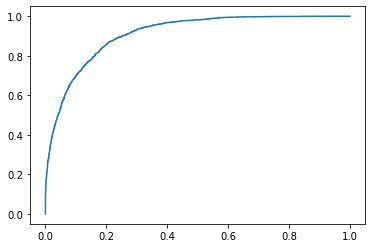

In [48]:
# Making the plot for the ROC curve
plt.figure()
plt.plot(false_positive_r,true_positive_r)
# plt.plot(false_positive_r_GaussianNB,true_positive_r_GaussianNB)
plt.show()

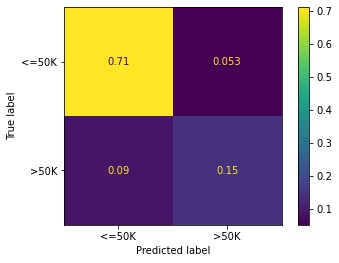

In [47]:
# plot_confusion_matrix(lr_train, df_test_X,df_test_y,display_labels=['<=50K','>50K'])
# plot_confusion_matrix(lr_train, df_test_X,df_test_y,display_labels=['<=50K','>50K'])
# plot_confusion_matrix(lr_train, df_test_X,df_test_y,display_labels=['<=50K','>50K'],normalize='all')
plot_confusion_matrix(lr_train, df_test_X,df_test_y,display_labels=['<=50K','>50K'],normalize='all',sample_weight=df_test['fnlwgt'])

#TODO
- Plot the ROC curve for each model tested 
- Plot the ROC_AUC_SCORE for each model tested
- Remove features and check metrics and models
- Remove the Other category created from ? and see if it changes metric and models
- 